In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
penguins = sns.load_dataset("penguins")

In [28]:
class Zscore:

    def __init__(self, np_columns: np.ndarray):
        self.data = np_columns.astype(float)
        self.means = np.nanmean(self.data, axis=0)
        self.stds = np.nanstd(self.data, axis=0)

    @staticmethod
    def get_single_score(np_column: np.ndarray):
        return np.abs((np_column - np.nanmean(np_column)) / np.nanstd(np_column))

    def get_score(self):
        return np.abs((self.data - self.means) / self.stds)

    def get_average_score(self):
        z = self.get_score()
        return np.nanmean(z, axis=1)


In [3]:
X = penguins[['bill_depth_mm','flipper_length_mm','body_mass_g']].to_numpy()

In [39]:
zsc = Zscore(X)

single_score_body_mass_g = Zscore.get_single_score(penguins['body_mass_g'].to_numpy())
single_score_flipper_length = Zscore.get_single_score(penguins['flipper_length_mm'].to_numpy())
single_score_bill_depth = Zscore.get_single_score(penguins['bill_depth_mm'].to_numpy())

agg_scores = zsc.get_average_score()

# Знайдемо нетипові
threshold = 3

body_mass_g_outliers = np.where(single_score_body_mass_g > threshold)[0]
flipper_length_outliers = np.where(single_score_flipper_length > threshold)[0]
bill_depth_outliers = np.where(single_score_bill_depth > threshold)[0]

outliers = np.where(agg_scores > threshold)[0]

# Якщо <5, беремо топ-5 за Z-score
if len(outliers) < 5:
    outliers = np.argsort(agg_scores)[-10:]

if len(body_mass_g_outliers) < 5:
    body_mass_g_outliers = np.argsort(single_score_body_mass_g)[-10:]

if len(flipper_length_outliers) < 5:
    flipper_length_outliers = np.argsort(single_score_flipper_length)[-10:]

if len(bill_depth_outliers) < 5:
    bill_depth_outliers = np.argsort(single_score_bill_depth)[-10:]

print("Outlier indices:", outliers)
print("body_mass_g outliers:", body_mass_g_outliers)
print("flipper_length_mm outliers:", flipper_length_outliers)
print("bill_depth_mm outliers:", bill_depth_outliers)

Outlier indices: [287 240 323 295 283 335 331 237   3 339]
body_mass_g outliers: [235 335 331 299 337 297 253 237 339   3]
flipper_length_mm outliers: [295 253 309 221 333 335 285 283   3 339]
bill_depth_mm outliers: [ 14  35  61 220  13  49 244  19   3 339]


C:\Users\demat\AppData\Local\Temp\ipykernel_15688\3300634205.py:17: RuntimeWarning: Mean of empty slice
  return np.nanmean(z, axis=1)


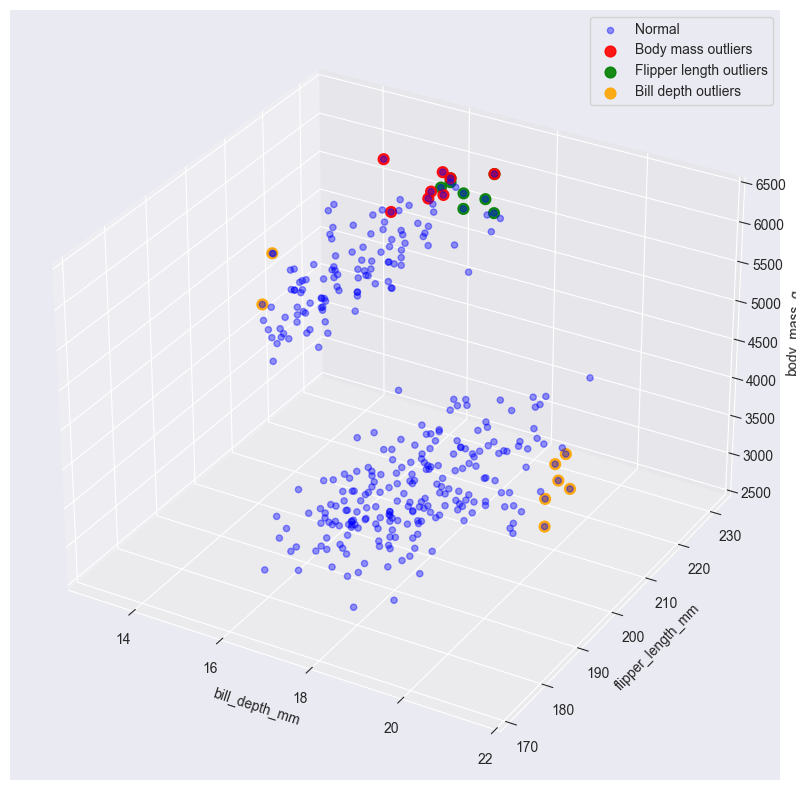

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")

# Normal
ax.scatter(penguins["bill_depth_mm"],
           penguins["flipper_length_mm"],
           penguins["body_mass_g"],
           c="blue", alpha=0.4, label="Normal")

# Body mass outliers
ax.scatter(penguins["bill_depth_mm"].iloc[body_mass_g_outliers],
           penguins["flipper_length_mm"].iloc[body_mass_g_outliers],
           penguins["body_mass_g"].iloc[body_mass_g_outliers],
           c="red", s=60, label="Body mass outliers", alpha=0.9)

# Flipper length outliers
ax.scatter(penguins["bill_depth_mm"].iloc[flipper_length_outliers],
           penguins["flipper_length_mm"].iloc[flipper_length_outliers],
           penguins["body_mass_g"].iloc[flipper_length_outliers],
           c="green", s=60, label="Flipper length outliers", alpha=0.9)

# Bill depth outliers
ax.scatter(penguins["bill_depth_mm"].iloc[bill_depth_outliers],
           penguins["flipper_length_mm"].iloc[bill_depth_outliers],
           penguins["body_mass_g"].iloc[bill_depth_outliers],
           c="orange", s=60, label="Bill depth outliers", alpha=0.9)

ax.set_xlabel("bill_depth_mm")
ax.set_ylabel("flipper_length_mm")
ax.set_zlabel("body_mass_g")
ax.legend()
plt.show()


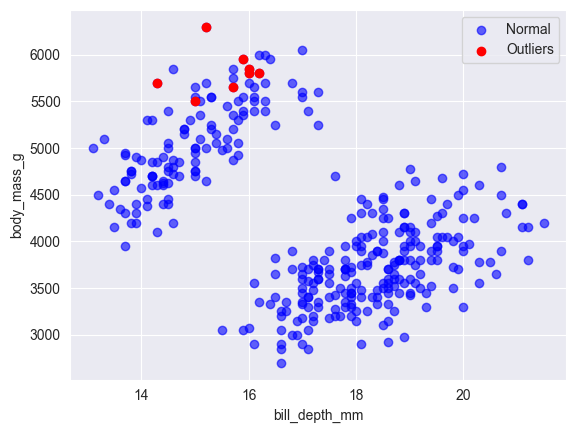

In [32]:
plt.scatter(X[:,0], X[:,2], c="blue", alpha=0.6, label="Normal")
plt.scatter(X[outliers,0], X[outliers,2], c="red", label="Outliers")
plt.xlabel("bill_depth_mm")
plt.ylabel("body_mass_g")
plt.legend()
plt.show()

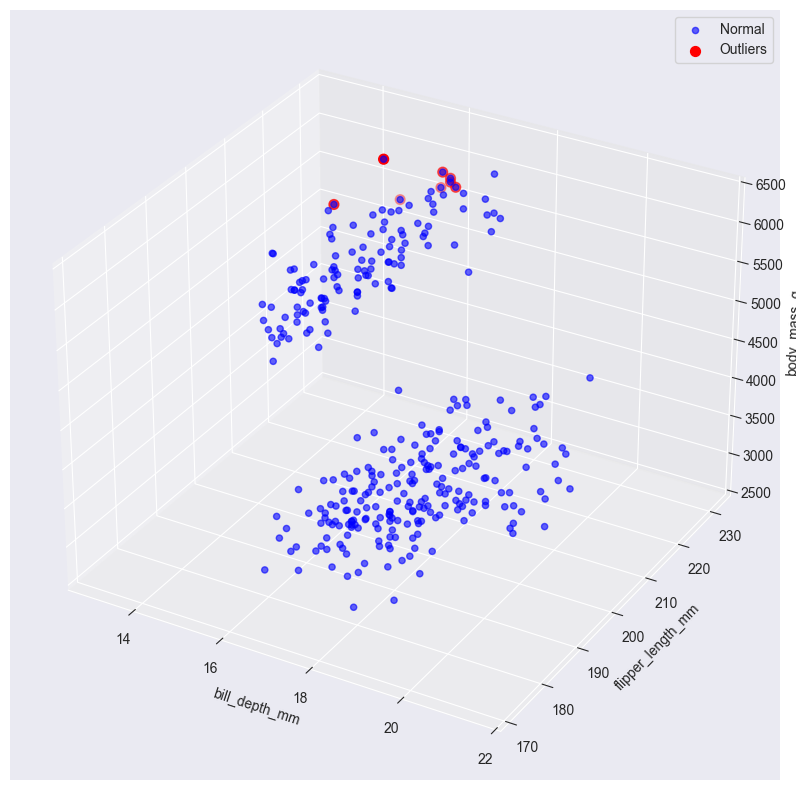

In [47]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c="blue", alpha=0.6, label="Normal")
ax.scatter(X[outliers,0], X[outliers,1], X[outliers,2], c="red", label="Outliers", s=50)
ax.set_xlabel("bill_depth_mm")
ax.set_ylabel("flipper_length_mm")
ax.set_zlabel("body_mass_g")
plt.legend()
plt.show()